# EDA

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

In [3]:
df_labels = pd.read_csv('data/label.csv')
print(f"labels:{df_labels.shape}")

labels:(300000, 3)


In [4]:
df_members = pd.read_csv('data/members_filtered.csv')
df_transactions = pd.read_csv('data/transactions_filtered.csv')
print(f"members:{df_members.shape}")
print(f"transactions:{df_transactions.shape}")

members:(300000, 7)
transactions:(3406383, 10)


In [ ]:
df_logs = pd.read_csv('data/user_logs_filtered.csv')
print(f"logs:{df_logs.shape}")

In [5]:
df_labels = df_labels.iloc[:, 1:]
df_labels

,msno,label
0,2dwuk0KQUnCnRvFnDGFyIslHLqG8lFHkyOvfRNwc5XI=,0
1,Bx13MoR+nVJVVDsatg3fxInFupmO1jSzdkFKMA976t8=,0
2,2ouWnOhbWxdFyjEy8qx/8lr15OzZ0PX9tr6xZP4Ihns=,0
3,QvZtxnHz7yGh07QiFuq0RN1hL5WrzcbKlQTUiroEEyE=,1
4,CUFR22oaKwIwzj4VMey3Mj76B5zawuo2PxsWheNfQ6Q=,0
...,...,...
299995,u2ZFhHBKeaNkXR5IWV88Id6zd5U6tc7Oxv/kVZ1ZQ/s=,0
299996,Z3QAHHe2PwgA1TZM7aN7yIO4M6OoT2xdvccutBe6SmE=,0
299997,Ut82CPYSqaueUjOrv47f9knp2qKcGGUTj3h+oXFBCy8=,0
299998,S84wwJdls1Zzv7+dKkhVgU1bbL6Laoo/tPNdFmzHlaA=,0


In [6]:
df_members = df_members.iloc[:, 1:]
df_members

,msno,city,bd,gender,registered_via,registration_init_time
0,2dwuk0KQUnCnRvFnDGFyIslHLqG8lFHkyOvfRNwc5XI=,5,0,female,9,20120309
1,Bx13MoR+nVJVVDsatg3fxInFupmO1jSzdkFKMA976t8=,13,33,female,7,20130422
2,2ouWnOhbWxdFyjEy8qx/8lr15OzZ0PX9tr6xZP4Ihns=,1,0,NaN,7,20140629
3,QvZtxnHz7yGh07QiFuq0RN1hL5WrzcbKlQTUiroEEyE=,13,0,NaN,9,20110528
4,CUFR22oaKwIwzj4VMey3Mj76B5zawuo2PxsWheNfQ6Q=,5,42,male,9,20141128
...,...,...,...,...,...,...
299995,u2ZFhHBKeaNkXR5IWV88Id6zd5U6tc7Oxv/kVZ1ZQ/s=,1,0,NaN,4,20161020
299996,Z3QAHHe2PwgA1TZM7aN7yIO4M6OoT2xdvccutBe6SmE=,1,0,NaN,4,20170311
299997,Ut82CPYSqaueUjOrv47f9knp2qKcGGUTj3h+oXFBCy8=,22,24,female,9,20130110
299998,S84wwJdls1Zzv7+dKkhVgU1bbL6Laoo/tPNdFmzHlaA=,1,0,NaN,4,20151022


In [7]:
# merging label dataset with members dataset
label_members = pd.merge(df_labels, df_members, on='msno', how='left')
label_members

,msno,label,city,bd,gender,registered_via,registration_init_time
0,2dwuk0KQUnCnRvFnDGFyIslHLqG8lFHkyOvfRNwc5XI=,0,5,0,female,9,20120309
1,Bx13MoR+nVJVVDsatg3fxInFupmO1jSzdkFKMA976t8=,0,13,33,female,7,20130422
2,2ouWnOhbWxdFyjEy8qx/8lr15OzZ0PX9tr6xZP4Ihns=,0,1,0,NaN,7,20140629
3,QvZtxnHz7yGh07QiFuq0RN1hL5WrzcbKlQTUiroEEyE=,1,13,0,NaN,9,20110528
4,CUFR22oaKwIwzj4VMey3Mj76B5zawuo2PxsWheNfQ6Q=,0,5,42,male,9,20141128
...,...,...,...,...,...,...,...
299995,u2ZFhHBKeaNkXR5IWV88Id6zd5U6tc7Oxv/kVZ1ZQ/s=,0,1,0,NaN,4,20161020
299996,Z3QAHHe2PwgA1TZM7aN7yIO4M6OoT2xdvccutBe6SmE=,0,1,0,NaN,4,20170311
299997,Ut82CPYSqaueUjOrv47f9knp2qKcGGUTj3h+oXFBCy8=,0,22,24,female,9,20130110
299998,S84wwJdls1Zzv7+dKkhVgU1bbL6Laoo/tPNdFmzHlaA=,0,1,0,NaN,4,20151022


In [8]:
label_members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   msno                    300000 non-null  object
 1   label                   300000 non-null  int64 
 2   city                    300000 non-null  int64 
 3   bd                      300000 non-null  int64 
 4   gender                  128468 non-null  object
 5   registered_via          300000 non-null  int64 
 6   registration_init_time  300000 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 16.0+ MB


In [9]:
# getting features wise null values (number)
label_members.isnull().sum()

msno                           0
label                          0
city                           0
bd                             0
gender                    171532
registered_via                 0
registration_init_time         0
dtype: int64

label
0    244430
1     55570
Name: count, dtype: int64
label
0    0.814767
1    0.185233
Name: proportion, dtype: float64


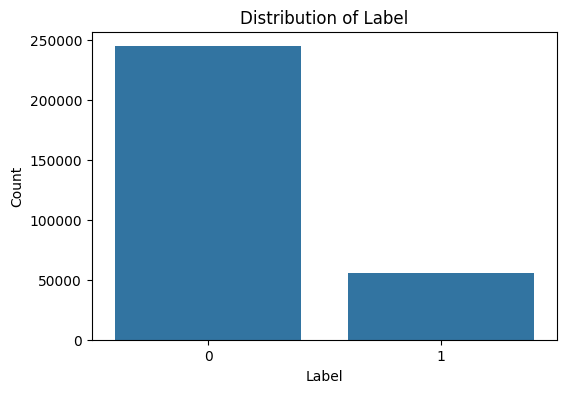

In [10]:
# label
print(label_members['label'].value_counts())
print(label_members['label'].value_counts(normalize=True))

plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=label_members)
plt.title('Distribution of Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [11]:
label_members['gender'].fillna('unknown', inplace=True)
label_members['gender'].value_counts(dropna=False)

C:\Users\suxin\AppData\Local\Temp\ipykernel_19176\3829374583.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  label_members['gender'].fillna('unknown', inplace=True)


gender
unknown    171532
male        65635
female      62833
Name: count, dtype: int64

gender
unknown    171532
male        65635
female      62833
Name: count, dtype: int64
gender
unknown    0.571773
male       0.218783
female     0.209443
Name: proportion, dtype: float64


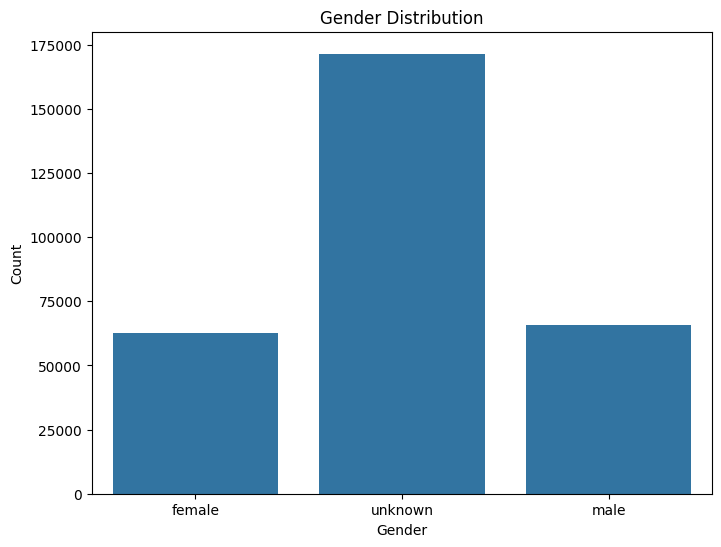

In [12]:
# gender
print(label_members['gender'].value_counts(dropna=False))
print(label_members['gender'].value_counts(normalize=True, dropna=False))

plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=label_members)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [13]:
# age
print(label_members['bd'].describe())

count    300000.000000
mean         12.760943
std          21.696574
min       -5978.000000
25%           0.000000
50%           0.000000
75%          26.000000
max        1052.000000
Name: bd, dtype: float64


In [14]:
print("Age < 0:")
print(len(label_members[label_members['bd'] < 0]))

print("Age > 100:")
print(len(label_members[label_members['bd'] > 100]))

Age < 0:
27
Age > 100:
185


In [15]:
label_members = label_members[(label_members['bd'] >= 0) & (label_members['bd'] <= 100)]
print(label_members['bd'].describe())

count    299788.000000
mean         12.644926
std          15.925822
min           0.000000
25%           0.000000
50%           0.000000
75%          26.000000
max         100.000000
Name: bd, dtype: float64


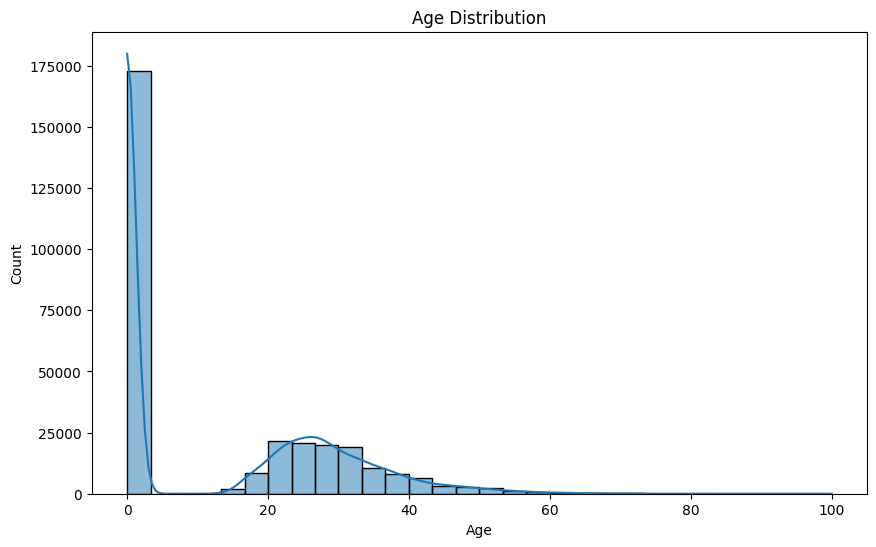

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data=label_members, x='bd', bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

C:\Users\suxin\AppData\Local\Temp\ipykernel_19176\2784396810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_members['bd'] = label_members['bd'].apply(lambda x: -1 if x == 0 else x)


count    126850.000000
mean         29.884091
std           9.178053
min           1.000000
25%          23.000000
50%          28.000000
75%          34.000000
max         100.000000
Name: bd, dtype: float64


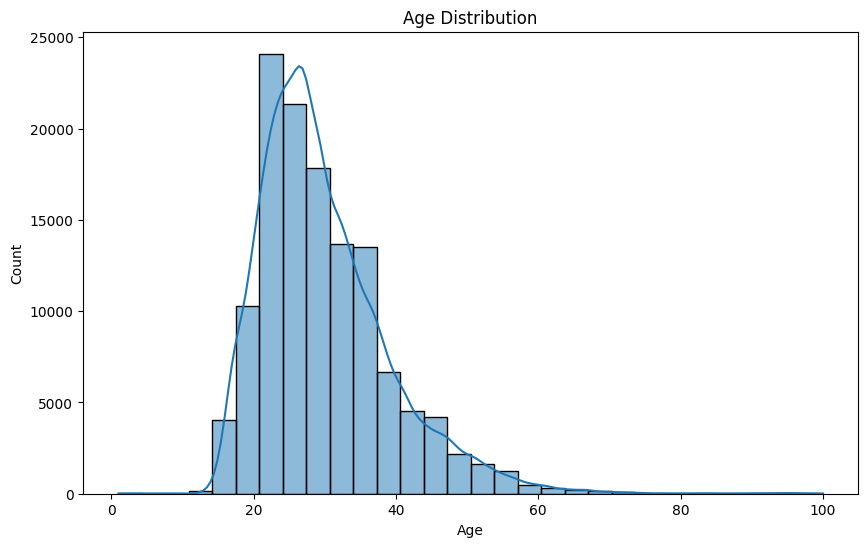

In [17]:
label_members['bd'] = label_members['bd'].apply(lambda x: -1 if x == 0 else x)

label_members_filtered = label_members[label_members['bd'] != -1]
print(label_members_filtered['bd'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(data=label_members_filtered, x='bd', bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

registered_via
7     100023
9      75782
4      67500
3      55385
11       532
13       241
8         91
5         79
17        38
2         34
6         27
16        23
19        20
14        12
10         1
Name: count, dtype: int64
registered_via
7     0.333646
9     0.252785
4     0.225159
3     0.184747
11    0.001775
13    0.000804
8     0.000304
5     0.000264
17    0.000127
2     0.000113
6     0.000090
16    0.000077
19    0.000067
14    0.000040
10    0.000003
Name: proportion, dtype: float64


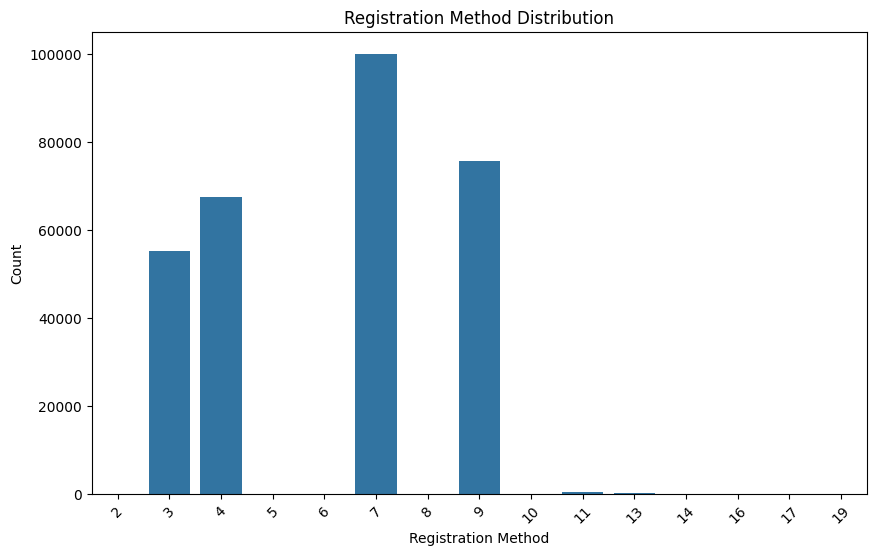

In [18]:
# register
print(label_members['registered_via'].value_counts())
print(label_members['registered_via'].value_counts(normalize=True))

plt.figure(figsize=(10, 6))
sns.countplot(x='registered_via', data=label_members)
plt.title('Registration Method Distribution')
plt.xlabel('Registration Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\suxin\AppData\Local\Temp\ipykernel_19176\2483478478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_members['registration_init_time']=pd.to_datetime(label_members['registration_init_time'], format='%Y%m%d')


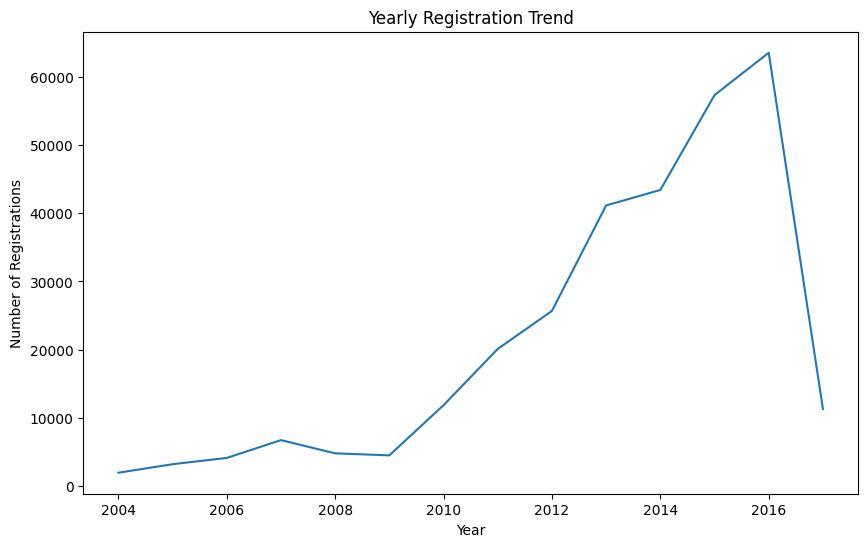

In [19]:
# registration time
label_members['registration_init_time']=pd.to_datetime(label_members['registration_init_time'], format='%Y%m%d')
yearly_registration = label_members['registration_init_time'].dt.year.value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_registration.index, y=yearly_registration.values)
plt.title('Yearly Registration Trend')
plt.xlabel('Year')
plt.ylabel('Number of Registrations')
plt.show()

In [20]:
df_transactions = df_transactions.iloc[:, 1:]
df_transactions

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,uQxbyACsPOEkTIrv9jZgoGXelGBW81ZsSZKy9fhj5Z8=,39,30,149,149,1,20150930,20151125,0
1,8qrtRZQTuCih4YJhjEwvVdi9ojgltQnW5Rmqz3iMRXU=,39,30,149,149,1,20150930,20151106,0
2,T4XSZA0yn0xAe3pjL4PwR4Oi9KooBibT+S/3xmzEZLw=,39,30,149,149,1,20150930,20151119,0
3,zw30zrUQUtiWnOYVEj4aMnLb13ENvOYtnnWq3bS9Yl0=,31,0,0,149,1,20150930,20151031,0
4,9Q5TRzlJL3KhTp4Hogm3Y5IIlEp3fuXc/7K+Psphrx8=,31,0,0,149,1,20150930,20151031,0
...,...,...,...,...,...,...,...,...,...
3406378,zWcHW2b0utgZSNFh54ovHOKaW1uQ8LJmQVB8CcsryHA=,32,90,298,298,0,20170204,20170505,0
3406379,zfWZZYFhsHO86rb3FRKDCEdxn6I1iAfsmab3tFJT1zY=,39,30,149,149,1,20170228,20170423,0
3406380,zoKouumOgyxte2SIOb6pIaR601xAqXt/wbL/f8cE1H4=,22,410,1788,1788,0,20160505,20170628,0
3406381,zqKy07nPbkuQMWvUV+g2OeNLoka2115jVfSDoZRSFJ8=,41,30,99,99,1,20170325,20170425,0


In [21]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3406383 entries, 0 to 3406382
Data columns (total 9 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   msno                    object
 1   payment_method_id       int64 
 2   payment_plan_days       int64 
 3   plan_list_price         int64 
 4   actual_amount_paid      int64 
 5   is_auto_renew           int64 
 6   transaction_date        int64 
 7   membership_expire_date  int64 
 8   is_cancel               int64 
dtypes: int64(8), object(1)
memory usage: 233.9+ MB


In [22]:
missing_values = df_transactions.isnull().sum()
print(missing_values)

msno                      0
payment_method_id         0
payment_plan_days         0
plan_list_price           0
actual_amount_paid        0
is_auto_renew             0
transaction_date          0
membership_expire_date    0
is_cancel                 0
dtype: int64


payment_method_id
41    1964597
40     541901
36     202377
39     187339
37     162466
38      94323
33      48993
34      36856
35      31810
30      25817
32      25374
31      19692
29      17966
27      14752
24       5498
23       5232
28       4196
16       3415
18       2205
20       1826
22       1803
26       1362
21       1327
19       1293
25        653
12        616
13        615
17        595
14        532
15        507
8         138
10        116
11         91
6          47
5          33
3          12
2           5
7           2
4           1
Name: count, dtype: int64
payment_method_id
41    5.767399e-01
40    1.590840e-01
36    5.941111e-02
39    5.499646e-02
37    4.769458e-02
38    2.769007e-02
33    1.438270e-02
34    1.081969e-02
35    9.338351e-03
30    7.579007e-03
32    7.448957e-03
31    5.780912e-03
29    5.274216e-03
27    4.330693e-03
24    1.614029e-03
23    1.535940e-03
28    1.231805e-03
16    1.002530e-03
18    6.473142e-04
20    5.360525e-04
22    5.2930

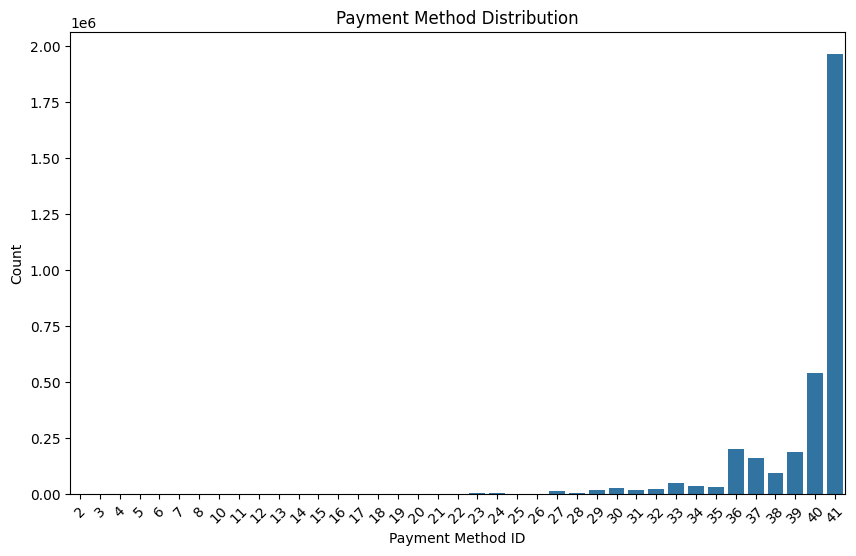

In [23]:
# payment method
print(df_transactions['payment_method_id'].value_counts())
print(df_transactions['payment_method_id'].value_counts(normalize=True))

plt.figure(figsize=(10, 6))
sns.countplot(x='payment_method_id', data=df_transactions)
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method ID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

is_auto_renew
1    3139086
0     267297
Name: count, dtype: int64
is_auto_renew
1    0.921531
0    0.078469
Name: proportion, dtype: float64


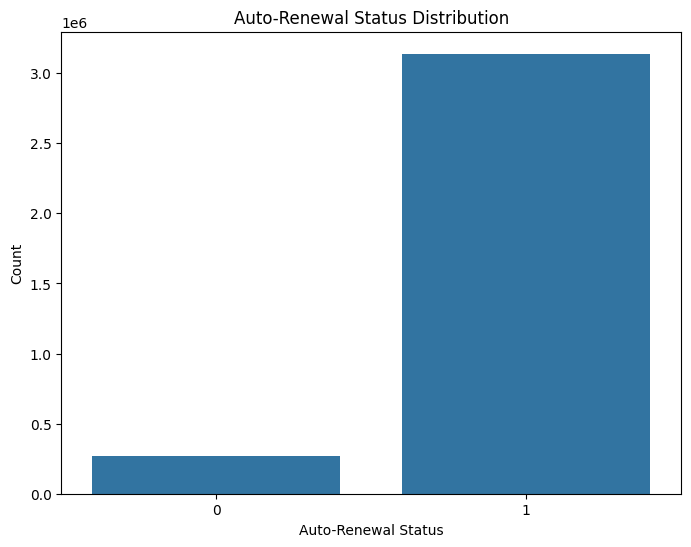

In [24]:
# auto renew
print(df_transactions['is_auto_renew'].value_counts())
print(df_transactions['is_auto_renew'].value_counts(normalize=True))

plt.figure(figsize=(8, 6))
sns.countplot(x='is_auto_renew', data=df_transactions)
plt.title('Auto-Renewal Status Distribution')
plt.xlabel('Auto-Renewal Status')
plt.ylabel('Count')
plt.show()